In [1]:
_2 = 613+72+315
_1 = 2793 + 699 + 1152

_1 / _2

4.644

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedhanyyy/chest-ctscan-images")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1


In [ ]:
! ls /root/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1/Data

test  train  valid


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_dir = "/root/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1/Data/train"
test_dir = "/root/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1/Data/test"
valid_dir = "/root/.cache/kagglehub/datasets/mohamedhanyyy/chest-ctscan-images/versions/1/Data/valid"

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224, 224)),  # Resizing
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),  # Converting to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalizing pixel values
])

train_data = datasets.ImageFolder(root=train_dir, transform=transform)
valid_data = datasets.ImageFolder(root=valid_dir, transform=transform)
test_data = datasets.ImageFolder(root=test_dir, transform=transform)

In [ ]:
print("Number of samples in the training set:", len(train_data))
print("Number of samples in the validation set:", len(valid_data))
print("Number of samples in the test set:", len(test_data))

Number of samples in the training set: 613
Number of samples in the validation set: 72
Number of samples in the test set: 315


In [ ]:
train_data.classes = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma']
valid_data.classes = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma']
test_data.classes = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma']

In [ ]:
# show the classes of each data set
print("Classes in the training set:", train_data.classes)
print("Classes in the validation set:", valid_data.classes)
print("Classes in the test set:", test_data.classes)


Classes in the training set: ['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma']
Classes in the validation set: ['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma']
Classes in the test set: ['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma']


Counter({0: 195, 3: 155, 2: 148, 1: 115})


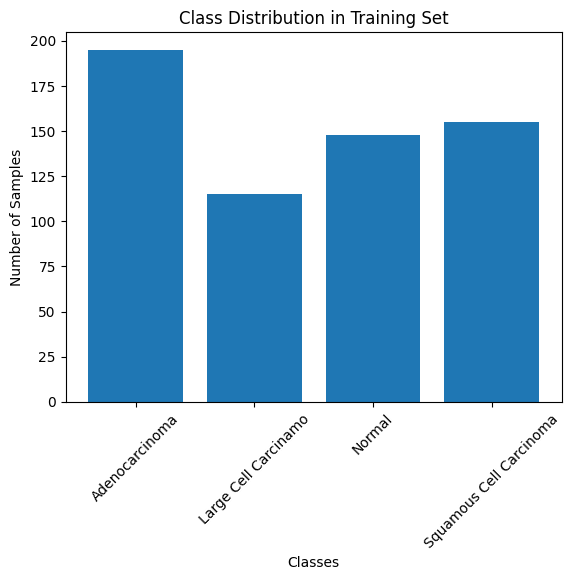

Counter({0: 120, 3: 90, 2: 54, 1: 51})


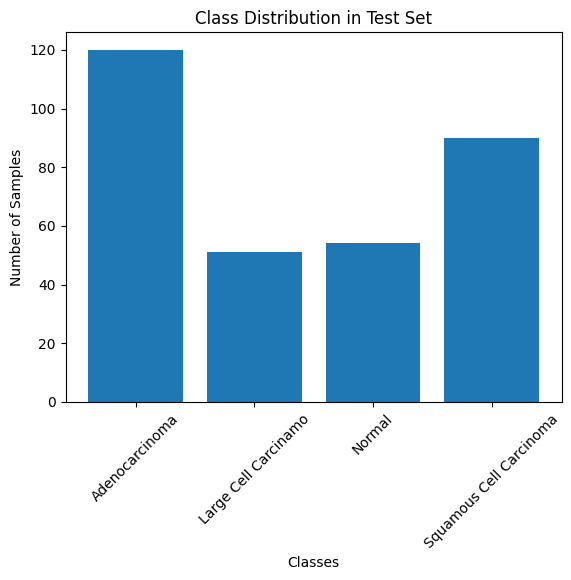

In [ ]:
#Count the number of samples in ea
from collections import Counter
import matplotlib.pyplot as plt

def visualize_class_distribution(data, title):
    counter = Counter(data.targets)
    print(counter)
    plt.bar(['Adenocarcinoma', 'Large Cell Carcinamo', 'Normal', 'Squamous Cell Carcinoma'], counter.values())
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.show()

visualize_class_distribution(train_data, "Class Distribution in Training Set")
visualize_class_distribution(test_data, "Class Distribution in Test Set")


In [ ]:
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = DataLoader(valid_data, batch_size=8, shuffle=False)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)

In [ ]:
next(iter(train_loader))

[tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         ...,
 
 
         [[[-1., -1., -1.,  ..., -

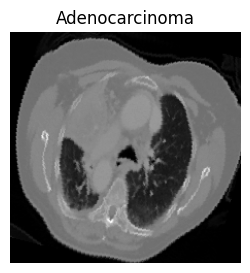

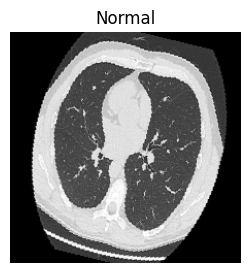

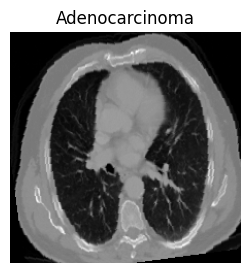

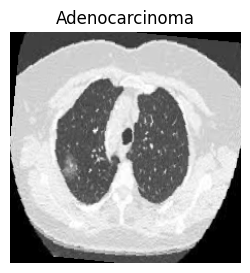

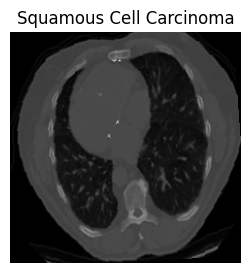

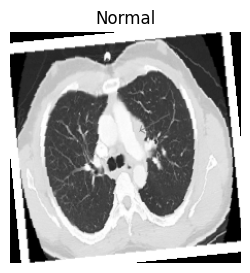

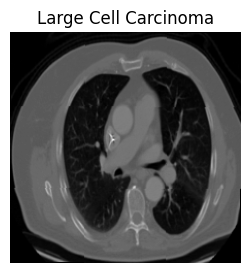

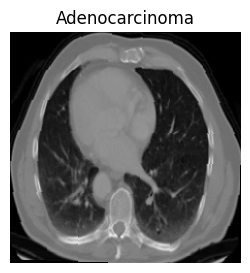

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')

dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plotting each image
for idx in range(len(images)):
    plt.figure(figsize=(3, 3))
    imshow(images[idx])
    plt.title(train_data.classes[labels[idx]])
    plt.show()

In [ ]:
print(train_data.classes)

['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal', 'Squamous Cell Carcinoma']


In [ ]:
print(set(train_data.targets))

{0, 1, 2, 3}


In [ ]:
import torch
from torch import nn
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.models import ResNet18_Weights

model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
model.fc = nn.Sequential (
    nn.Linear(512,512),
    nn.Dropout(0.3),
    nn.Linear(512,256),
    nn.Dropout(0.2),
    nn.Linear(256,4),
)
model.fc

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): Dropout(p=0.3, inplace=False)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=4, bias=True)
)

In [ ]:
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00001)

# Lists to store losses
train_losses = []
valid_losses = []

# Training settings
early_stop_patience = 3
epochs_no_improve = 0
n_epochs = 30
valid_loss_min = np.Inf  # Track minimum validation loss

# Training and validation loop
for epoch in range(1, n_epochs + 1):
    train_loss = 0.0
    valid_loss = 0.0

    ###################
    # Train the model #
    ###################
    model.train()
    for data, target in train_loader:

        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        model = model.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)  # Multiply by batch size

    ######################
    # Validate the model #
    ######################
    model.eval()
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            model = model.to(device)
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader.sampler)
    valid_loss = valid_loss / len(val_loader.sampler)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    # Print statistics
    print(f'Epoch: {epoch} \tTraining Loss: {train_loss:.6f} \tValidation Loss: {valid_loss:.6f}')

    # Save model if validation loss decreases
    if valid_loss <= valid_loss_min:
        print(f'Validation loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model ...')
        torch.save(model.state_dict(), 'best_model.pt')
        valid_loss_min = valid_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve == early_stop_patience:
        print(f'Early stopping triggered.')
        break

Epoch: 1 	Training Loss: 1.247205 	Validation Loss: 1.129074
Validation loss decreased (inf --> 1.129074). Saving model ...
Epoch: 2 	Training Loss: 1.038580 	Validation Loss: 1.006502
Validation loss decreased (1.129074 --> 1.006502). Saving model ...
Epoch: 3 	Training Loss: 0.939076 	Validation Loss: 0.981148
Validation loss decreased (1.006502 --> 0.981148). Saving model ...
Epoch: 4 	Training Loss: 0.860983 	Validation Loss: 0.884414
Validation loss decreased (0.981148 --> 0.884414). Saving model ...
Epoch: 5 	Training Loss: 0.761073 	Validation Loss: 0.853679
Validation loss decreased (0.884414 --> 0.853679). Saving model ...
Epoch: 6 	Training Loss: 0.681571 	Validation Loss: 0.799914
Validation loss decreased (0.853679 --> 0.799914). Saving model ...
Epoch: 7 	Training Loss: 0.602256 	Validation Loss: 0.774985
Validation loss decreased (0.799914 --> 0.774985). Saving model ...
Epoch: 8 	Training Loss: 0.567993 	Validation Loss: 0.703649
Validation loss decreased (0.774985 --> 0

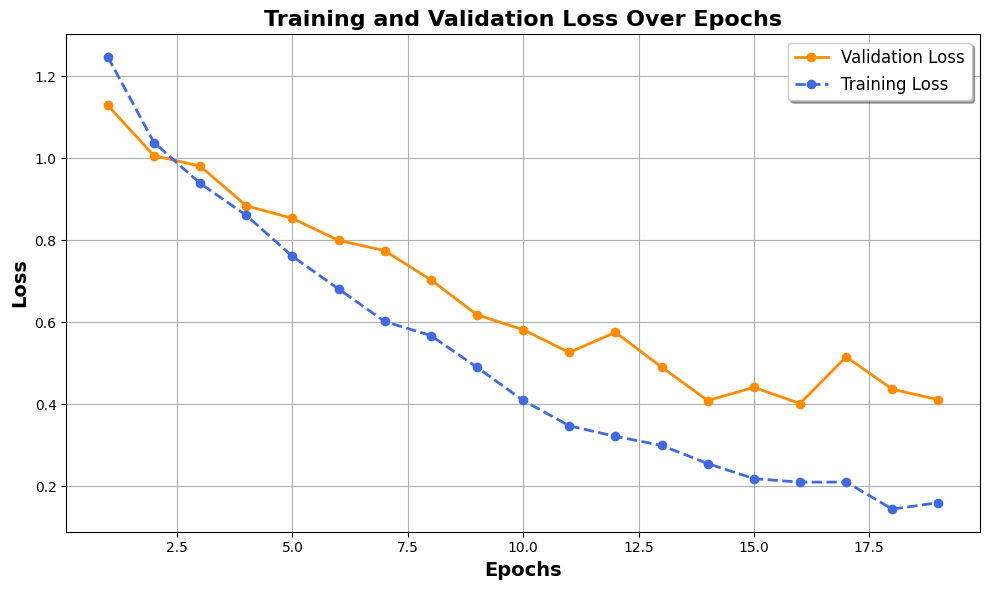

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses)+1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, valid_losses, label='Validation Loss', linestyle='-', marker='o', linewidth=2, color='darkorange')
plt.plot(epochs, train_losses, label='Training Loss', linestyle='--', marker='o', linewidth=2, color='royalblue')
plt.title('Training and Validation Loss Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=14, fontweight='bold')
plt.grid(visible=True)
plt.legend(fontsize=12, loc='upper right', shadow=True)
plt.tight_layout()

plt.show()

In [ ]:
# Track test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(4))
class_total = list(0. for i in range(4))
size = len(test_data)

predictions = np.zeros(size)
all_classes = np.zeros(size)
all_proba = np.zeros((size, 4))
idx = 0

model.eval()

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.item() * data.size(0)
        _, pred = torch.max(output, 1)

        # Compare predictions to true labels
        correct_tensor = pred.eq(target.view_as(pred))
        correct = np.squeeze(correct_tensor.cpu().numpy())

        predictions[idx:idx+len(target)] = pred.cpu().numpy()
        all_classes[idx:idx+len(target)] = target.cpu().numpy()
        all_proba[idx:idx+len(target), :] = output.cpu().numpy()
        idx += len(target)

        # Calculating test accuracy for each class
        for i in range(len(target)):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

# Average test loss
test_loss = test_loss / len(test_loader.dataset)

# Print results
print(f'Test Loss: {test_loss:.6f}\n')

# Per-class accuracy
for i in range(4):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            train_data.classes[i], 100 * class_correct[i] / class_total[i],
            int(class_correct[i]), int(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

# Overall accuracy
overall_accuracy = 100. * sum(class_correct) / sum(class_total)
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    overall_accuracy, int(sum(class_correct)), int(sum(class_total))))

Test Loss: 0.434584

Test Accuracy of Adenocarcinoma: 70% (84/120)
Test Accuracy of Large Cell Carcinoma: 98% (50/51)
Test Accuracy of Normal: 98% (53/54)
Test Accuracy of Squamous Cell Carcinoma: 86% (78/90)

Test Accuracy (Overall): 84% (265/315)


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def make_fig_cm(cm, classes):
    fig = plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)
    plt.tight_layout()
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        coeff = f'{cm[i, j]}'
        plt.text(j, i, coeff, horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12, fontweight='bold')

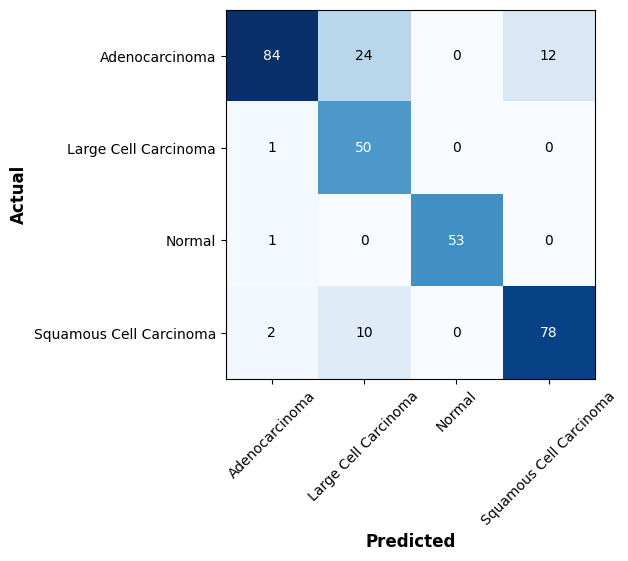

In [ ]:
classes = train_data.classes
cm = confusion_matrix(all_classes, predictions)
make_fig_cm(cm, classes)